In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("BankCustomers.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]
# convert categorical feature into dummy variables

states=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#concatenate the remaining dummies columns
X=pd.concat([X,states,gender],axis=1)

#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)


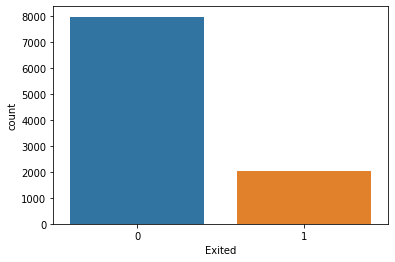

In [4]:
sns.countplot(x='Exited', data=df)

In [5]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
X=scaled_data

In [7]:
len(df)-df['Exited'].sum(),df['Exited'].sum()

(7963, 2037)

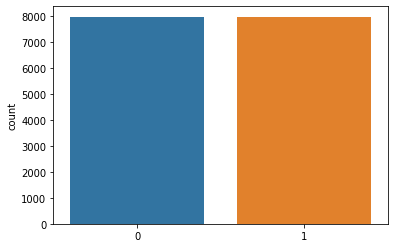

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, y_resampled = SMOTE(n_jobs = -1).fit_resample(X, y)
sns.countplot(y_resampled, data=df)

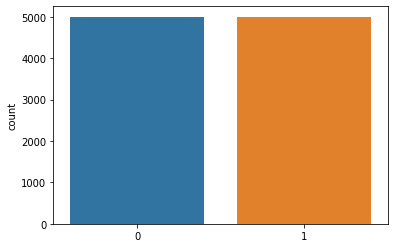

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
X_resampled, y_resampled = SMOTE({0: 7963, 1:5000}, n_jobs = -1).fit_resample(X, y)
X_resampled, y_resampled = NearMiss({0: 5000, 1:5000}, version = 2, n_jobs = -1).fit_resample(X_resampled, y_resampled)
sns.countplot(y_resampled, data=df)


In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 0)

In [30]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver = 'lbfgs', alpha = 0.0001)
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)
prediction_train = logmodel.predict(X_train)

TypeError: __init__() got an unexpected keyword argument 'alpha'

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predictions)
#confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
print("\n Classification report : \n",classification_report(y_test,predictions))
print("Test Accuracy   Score : ",accuracy_score(y_test,predictions))
print("Test F1   Score : ",f1_score(y_test,predictions))
print("\nTrain Accuracy   Score : ",accuracy_score(y_train,prediction_train))
print("Train F1   Score : ",f1_score(y_train, prediction_train))
print(conf_matrix)



 Classification report : 
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      2384
           1       0.72      0.71      0.71      2394

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778

Test Accuracy   Score :  0.7153620761825031
Test F1   Score :  0.7139251156920488

Train Accuracy   Score :  0.7161822748475063
Train F1   Score :  0.7133538684544303
[[1721  663]
 [ 697 1697]]


In [26]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logmodel, X_resampled, y_resampled, cv=4, scoring = 'f1')
print("Corss_Vall result:",score.mean())

Corss_Vall result: 0.7116321236997633


In [ ]:
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [ ]:
df["Age"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')

In [ ]:
df.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")